# installing needed packages.

In [ ]:
! pip install tqdm

In [ ]:
! pip install cv2

In [ ]:
! pip install os

# importing packages.

In [2]:
import numpy as np 
import cv2
import os
from tqdm import tqdm
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense,Cropping2D,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam

# loading data.

In [3]:
direc = 'F:/FER/CK+48'
CATEGORIES = os.listdir(direc)

In [4]:
def load_data():
    DATADIR = direc
    data = []
    # loading training data
    for category in CATEGORIES:
        # create path to image of respective expression
        path = os.path.join(DATADIR, category)
        # get the classification  for each expression 
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), 0)
            data.append([img_array, class_num])
            
    return data

# defining train and test set.

In [5]:
data = load_data()
X = np.array([ x[0] for x in data])
y = np.array([Y[1] for Y in data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50, shuffle = True)
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

100%|██████████| 249/249 [00:00<00:00, 2110.29it/s]


# CNN Model:

In [13]:
model = Sequential()

model.add(Conv2D(6, (5,5), padding='same', input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

model.compile(loss='categorical_crossentropy', metrics=METRICS, optimizer='adam')

In [16]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='tb', histogram_freq=1, )

In [17]:
epochs = 35
hist = model.fit(X_train, y_train, batch_size=20 , epochs=35, validation_data = (X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/35
37/37 [==============================] - 3s 42ms/step - loss: 1.8688 - accuracy: 0.2490 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6370 - val_loss: 1.7705 - val_accuracy: 0.2561 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7181
Epoch 2/35
37/37 [==============================] - 1s 26ms/step - loss: 1.6858 - accuracy: 0.3551 - precision: 0.9583 - recall: 0.0626 - auc: 0.7238 - val_loss: 1.3062 - val_accuracy: 0.6301 - val_precision: 1.0000 - val_recall: 0.2073 - val_auc: 0.8579
Epoch 3/35
37/37 [==============================] - 1s 25ms/step - loss: 1.2442 - accuracy: 0.5401 - precision: 0.8702 - recall: 0.3374 - auc: 0.8615 - val_loss: 0.9567 - val_accuracy: 0.6992 - val_precision: 0.9717 - val_recall: 0.4187 - val_auc: 0.9334
Epoch 4/35
37/37 [==============================] - 1s 24ms/step - loss: 0.9712 - accuracy: 0.6313 - precision: 0.8596 - recall: 0.4667 - auc: 0.9205 - val_loss: 0.7012 - val_accuracy: 0.7398 - val_precision: 0.9527 - v

In [ ]:
# to see tensorboard window, you should run this << tensorboard --logdir tb >> in CMD in the directory of your code!

# final accuracy of the model = 99-100 %

In [5]:
model.save_weights('F:/FER/FER_project/CK+_model.h5')

NameError: name 'model' is not defined

# plotting metrics.

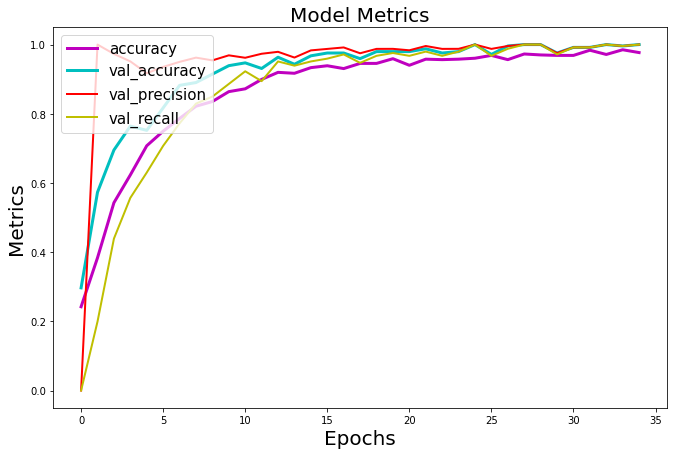

In [45]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(11,7))
plt.plot(hist.history['accuracy'], color='m', linewidth=3.0)
plt.plot(hist.history['val_accuracy'], color='c',linewidth=3.0 )
plt.plot(hist.history['val_precision'], color='r',linewidth=2.0 )
plt.plot(hist.history['val_recall'], color='y',linewidth=2.0 )
plt.title('Model Metrics',fontsize = 20 )
plt.ylabel('Metrics',fontsize = 20)
plt.xlabel('Epochs',fontsize = 20)
plt.legend(['accuracy', 'val_accuracy','val_precision','val_recall'], loc='upper left',fontsize = 15)
plt.show()

# confusion matrix:

In [15]:
# first run the cnn model cell. 

In [6]:
from keras.models import load_model
model = load_model('F:/FER/FER_project/CK+_model.h5')

Error: Canceled future for execute_request message before replies were done

In [1]:
model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

In [9]:
y_pred = model.predict(X_test)
labels = ['angry','neutral','disgust','fear','happy','sad','surprise']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(tf.argmax(y_test, axis = 1), tf.argmax(y_pred, axis = 1))

Error: Canceled future for execute_request message before replies were done

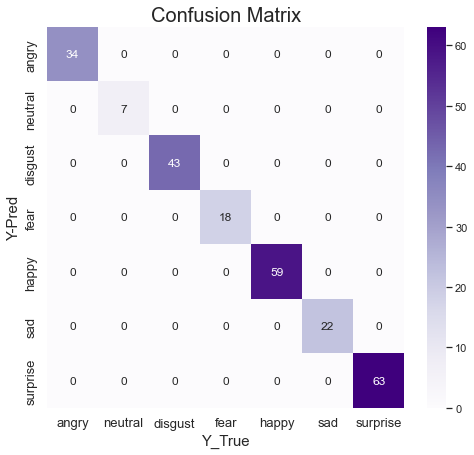

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
DetaFrame_cm = pd.DataFrame(cm, range(7), range(7))
p = sns.heatmap(DetaFrame_cm , cmap='Purples',annot=True)
p.set_title("Confusion Matrix",fontsize = 20)
sns.set(rc = {'figure.figsize':(8,7)})
sns.set(font_scale = 1)
p.set_yticklabels(labels, size = 13)
p.set_xticklabels(labels, size = 13)
p.set_xlabel("Y_True", fontsize = 15)
p.set_ylabel("Y-Pred", fontsize = 15)
plt.show()

# emotion recognetion trough webcam:

In [ ]:
emotion =  ['Anger', 'Neutral' ,'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']

model = keras.models.load_model("./CK+_model.h5")
font = cv2.FONT_HERSHEY_SIMPLEX
cam = cv2.VideoCapture(0)
face_cas = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_default.xml')

while True:
    ret, frame = cam.read()
    
    if ret==True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #gray = cv2.flip(gray,1)
        faces = face_cas.detectMultiScale(gray, 1.3,5)
        
        for (x, y, w, h) in faces:
            face_component = gray[y:y+h, x:x+w]
            fc = cv2.resize(face_component, (48, 48))
            inp = np.reshape(fc,(1,48,48,1)).astype(np.float32)
            inp = inp/255.
            prediction = model.predict(inp)
            em = emotion[np.argmax(prediction)]
            score = np.max(prediction)
            cv2.putText(frame, em+"  "+str(score*100)+'%', (x, y), font, 1, (0, 255, 0), 2)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.imshow("image", frame)
        
        if cv2.waitKey(1) == 27:
            break
    else:
        print ('Error')

cam.release()
cv2.destroyAllWindows()